In [ ]:
#####testing  clustering 
##### clustering ia a datamining techniqques which group unlabel data based onthier similarities or difference 
###clusterin algo. can be categorizewd into a few type speiciffis

###1. Hierarchical clustering
###2. K-means clustering
###3. DBSCAN clustering


###1. Hierarchical clustering
#Hierarchical clustering is a type of unsupervised machine learning algorithm that groups similar objects into clusters


####2. K-means clustering
### K-means clustering is 

In [ ]:
#### Generalized algorithm
# generalize algorithm is 

In [1]:
####limitation


#### DataSET

In [13]:
###file loading 


import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
df  =  pd.read_csv("headlines.csv",header =  None)
df.head

<bound method NDFrame.head of                                                       0
0     Budget to set scene for election\n \n Gordon B...
1     Army chiefs in regiments decision\n \n Militar...
2     Howard denies split over ID cards\n \n Michael...
3     Observers to monitor UK election\n \n Minister...
4     Kilroy names election seat target\n \n Ex-chat...
...                                                 ...
2220  India opens skies to competition\n \n India wi...
2221  Yukos bankruptcy 'not US matter'\n \n Russian ...
2222  Survey confirms property slowdown\n \n Governm...
2223  High fuel prices hit BA's profits\n \n British...
2224  US trade gap hits record in 2004\n \n The gap ...

[2225 rows x 1 columns]>

In [14]:
df.shape

(2225, 1)

In [15]:
print(df.iloc[1,:].values[0])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

TypeError: Image data of dtype object cannot be converted to float

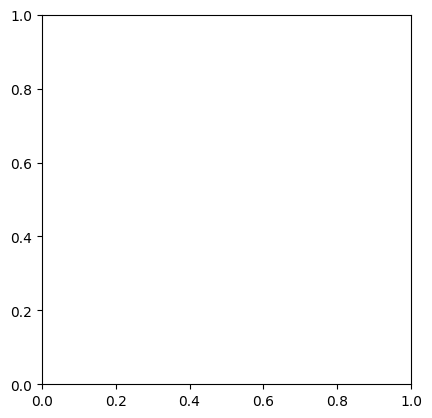

In [16]:
from wordcloud import WordCloud


wc = WordCloud(background_color='white', max_words=100).generate(' '.join(java))

plt.figure(figsize=(16,9))
plt.imshow(wc)

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

swords  =  stopwords.words('english')
wnl =  WordNetLemmatizer()

In [32]:
def lemmatize(word):
    tag =  pos_tag([word])
    pos  ='n'
    #print(tag)
    if tag[0][1].startswith('N'):
        pos ='n'
    elif tag[0][1].startswith('V'):
        pos =  'v'
    elif tag[0][1].startswith('R'):
        pos =  'r'
    elif tag[0][1].startswith('J'):
        pos =  'a'
    return wnl.lemmatize(word,pos=pos)

In [33]:
lemmatize("smaller")

'small'

In [34]:
lemmatize("the")

'the'

In [44]:
def clean_text(sent):
    token1 = word_tokenize(sent)
    # Remove only the punchuations
    token2 = [token for token in token1 if token.isalnum()] 
    # #) remove the stop words
    swards = stopwords.words('english')
    token3 = [token.lower() for token in token2 if token.lower() not in swards]
    token4  =  [lemmatize(token) for token in token3]
    return token4
    

In [45]:
sent   =  'Hello frineds ! How are you ? He likes  Python Programing '

In [46]:
clean_text(sent)

['hello', 'frineds', 'like', 'python', 'program']

#### TF * IDF Vectorize 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [49]:
tf  =  TfidfVectorizer(analyzer=clean_text)


In [50]:
x_new =  tf.fit_transform(df[0])

In [51]:
x_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

Create the Clusters 

In [52]:
from sklearn.cluster  import KMeans


In [53]:
km  =  KMeans(random_state=0)


In [54]:
km.fit_predict(x_new)

array([4, 6, 4, ..., 2, 5, 2])

In [55]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [59]:
km.inertia_ ### sum sqaure error 

2067.496919411737

##### Elbow Method 

In [61]:
sse  =[]
for k in range (1,16):
    km  =  KMeans(n_clusters=k,random_state=0,n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)


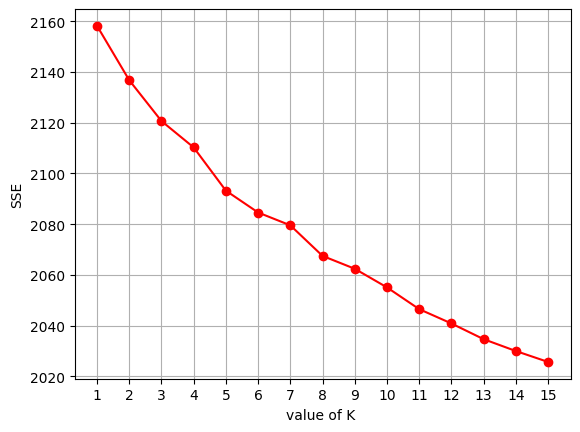

In [63]:
plt.xlabel('value of K ')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker = 'o',color  =  'r')

Create the clusters

In [67]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [68]:
labels = km.fit_predict(x_new)

In [69]:
labels

array([4, 3, 4, ..., 3, 3, 3])

##### Sepearete the clusters

In [72]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]


In [73]:
print('Cluster-0', len(zero))
print('Cluster-1', len(one))
print('Cluster-2', len(two))
print('Cluster-3', len(three))
print('Cluster-4', len(four))

Cluster-0 376
Cluster-1 331
Cluster-2 521
Cluster-3 716
Cluster-4 281


##### Word Cloud

In [74]:
from wordcloud import WordCloud

In [78]:
wc = WordCloud().generate(' '.join(one[0]))

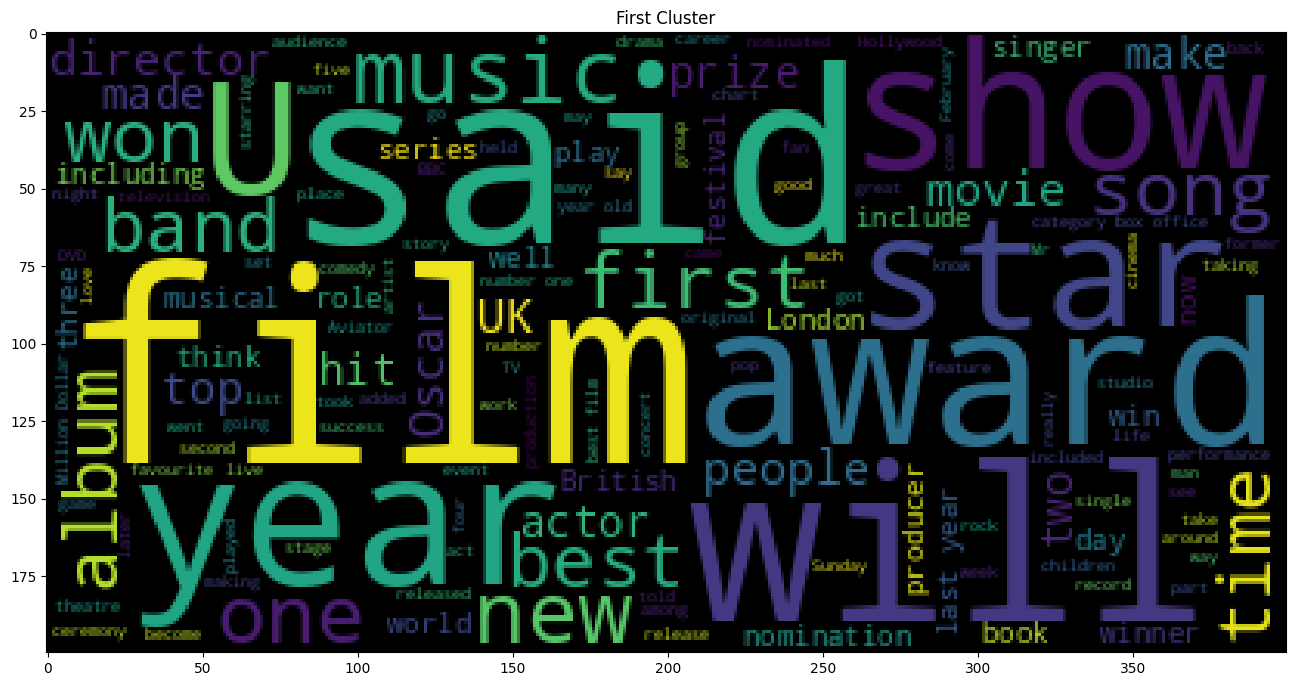

In [79]:
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [82]:
swards = stopwords.words('english')

In [83]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swards and x.isalpha() ]
freq = FreqDist(clean)
freq.most_common(10)


[('film', 669),
 ('said', 621),
 ('best', 575),
 ('also', 337),
 ('year', 319),
 ('music', 289),
 ('show', 261),
 ('one', 250),
 ('US', 246),
 ('first', 212)]

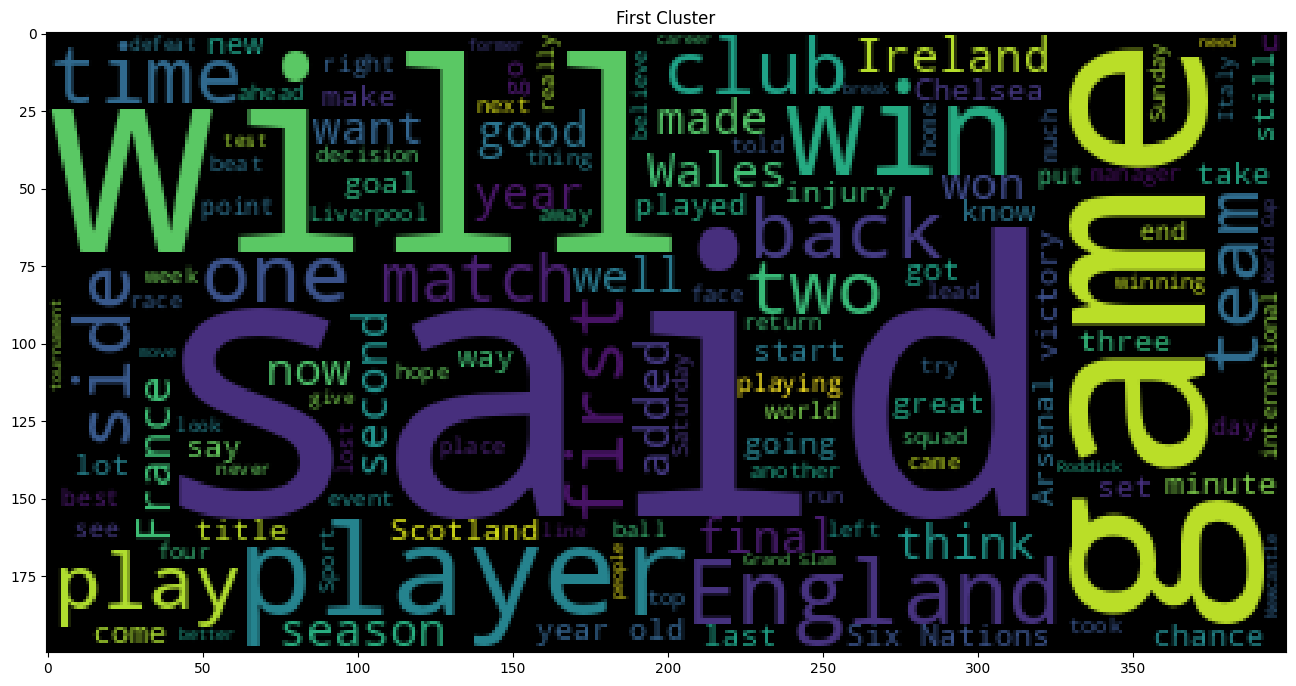

In [85]:
## Decond Cluster
wc = WordCloud().generate(' '.join(two[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [87]:
from nltk import FreqDist
swards = stopwords.words('english')
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swards and x.isalpha() ]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 963),
 ('game', 520),
 ('England', 465),
 ('first', 440),
 ('would', 422),
 ('win', 412),
 ('last', 370),
 ('one', 344),
 ('also', 343),
 ('two', 342)]

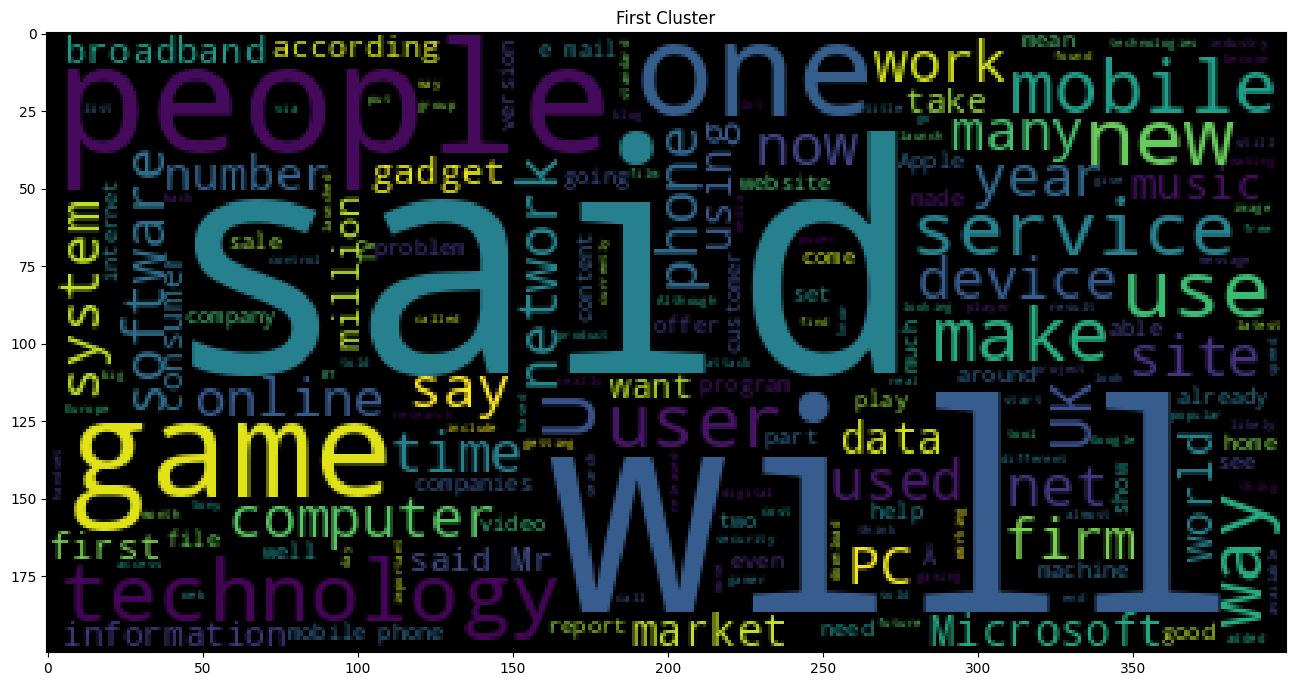

In [94]:
## Zeroth Cluster
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [93]:
from nltk import FreqDist
swards = stopwords.words('english')
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swards and x.isalpha() ]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1518),
 ('people', 885),
 ('also', 490),
 ('Mr', 475),
 ('technology', 468),
 ('new', 448),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 417)]

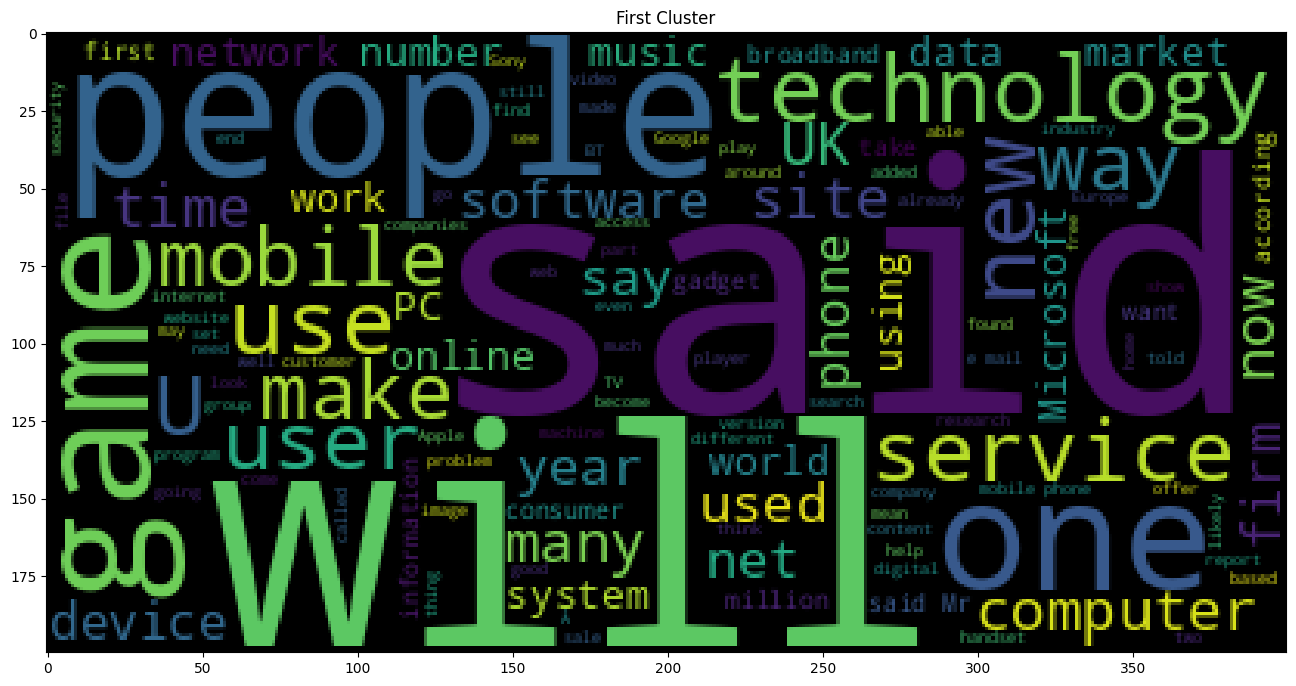

In [95]:
## Third Cluster
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [96]:
from nltk import FreqDist
swards = stopwords.words('english')
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swards and x.isalpha() ]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 2614),
 ('US', 932),
 ('Mr', 867),
 ('would', 775),
 ('year', 761),
 ('also', 603),
 ('government', 530),
 ('could', 463),
 ('company', 457),
 ('new', 451)]

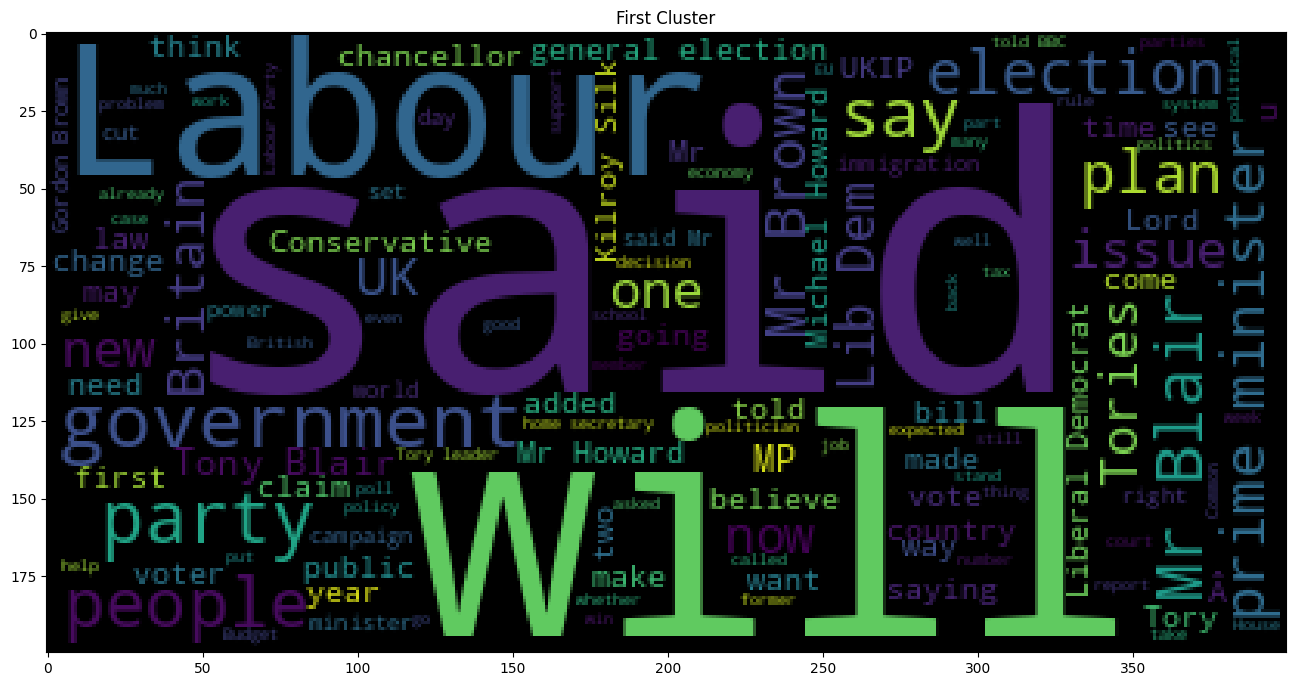

In [97]:
## fourth Cluster
wc = WordCloud().generate(' '.join(four[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [98]:
from nltk import FreqDist
swards = stopwords.words('english')
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swards and x.isalpha() ]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1528),
 ('Mr', 1485),
 ('would', 814),
 ('Labour', 727),
 ('election', 547),
 ('Blair', 540),
 ('government', 501),
 ('people', 431),
 ('party', 411),
 ('Brown', 375)]